<a href="https://colab.research.google.com/github/issacridhin/S5_Predictive-Analysis/blob/main/2348546_Lab8_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Traveling Salesman Problem is a well-established optimization problem where a salesman must visit a given set of cities exactly once and return to the starting city, all while minimizing the total distance traveled**.

 **This problem is used  in applications such as route optimization and supply chain management and extensively explored in fields like computer science, operations research, and logistics, due to its combinatorial complexity and its practical relevance**.

Distance Matrix (with City Names):
City A: [ 0.         50.17136011 82.42154906 32.75536921 33.19807081]
City B: [50.17136011  0.         72.64288903 72.50660878 17.05893848]
City C: [82.42154906 72.64288903  0.         71.69025114 70.91551038]
City D: [32.75536921 72.50660878 71.69025114  0.         56.55792068]
City E: [33.19807081 17.05893848 70.91551038 56.55792068  0.        ]


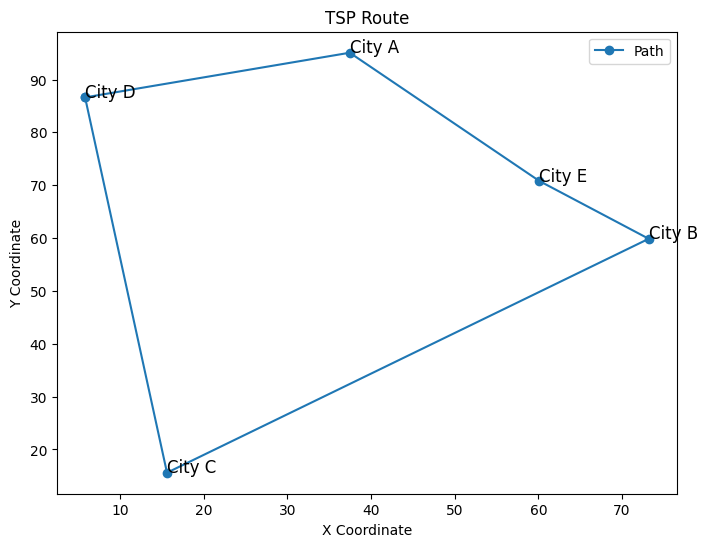


Shortest Route Distance: 227.34551867849092
Best Route (in city names): ['City D', 'City A', 'City E', 'City B', 'City C']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Defining the city names
city_names = ["City A", "City B", "City C", "City D", "City E"]

# Random coordinates for cities
np.random.seed(42)
num_cities = len(city_names)
cities = np.random.rand(num_cities, 2) * 100  # Random city coordinates in a 100x100 grid

# Calculating distance matrix
def calculate_distance_matrix(cities):
    num_cities = len(cities)
    matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(num_cities):
            matrix[i][j] = np.linalg.norm(cities[i] - cities[j])
    return matrix

distance_matrix = calculate_distance_matrix(cities)

# Distance matrix with city names
print("Distance Matrix (with City Names):")
for i, row in enumerate(distance_matrix):
    print(f"{city_names[i]}: {row}")

# Genetic Algorithm functions
def create_route():
    return random.sample(range(num_cities), num_cities)

def initial_population(pop_size):
    return [create_route() for _ in range(pop_size)]

def route_distance(route):
    return sum(distance_matrix[route[i], route[i + 1]] for i in range(len(route) - 1)) + \
           distance_matrix[route[-1], route[0]]

def fitness(route):
    return 1 / route_distance(route)

def rank_routes(population):
    fitness_results = [(route, fitness(route)) for route in population]
    return sorted(fitness_results, key=lambda x: x[1], reverse=True)

def selection(ranked, elite_size):
    selection_results = [i for i in range(elite_size)]
    for _ in range(len(ranked) - elite_size):
        pick = random.random()
        for i, (_, fit) in enumerate(ranked):
            if pick <= fit:
                selection_results.append(i)
                break
    return selection_results

def crossover(parent1, parent2):
    gene_a = int(random.random() * len(parent1))
    gene_b = int(random.random() * len(parent1))
    start_gene = min(gene_a, gene_b)
    end_gene = max(gene_a, gene_b)

    child_p1 = parent1[start_gene:end_gene]
    child_p2 = [item for item in parent2 if item not in child_p1]
    return child_p1 + child_p2

def crossover_population(mating_pool):
    children = []
    pool = random.sample(mating_pool, len(mating_pool))
    for i in range(len(mating_pool)):
        child = crossover(pool[i], pool[len(mating_pool) - i - 1])
        children.append(child)
    return children

def mutate(route, mutation_rate):
    for swapped in range(len(route)):
        if random.random() < mutation_rate:
            swap_with = int(random.random() * len(route))
            route[swapped], route[swap_with] = route[swap_with], route[swapped]
    return route

def mutate_population(population, mutation_rate):
    return [mutate(ind, mutation_rate) for ind in population]

def next_generation(current_gen, elite_size, mutation_rate):
    ranked = rank_routes(current_gen)
    selection_results = selection(ranked, elite_size)
    mating_pool = [current_gen[i] for i in selection_results]
    children = crossover_population(mating_pool)
    next_generation = mutate_population(children, mutation_rate)
    return next_generation

# Genetic Algorithm
def genetic_algorithm(cities, pop_size, elite_size, mutation_rate, generations):
    population = initial_population(pop_size)
    for _ in range(generations):
        population = next_generation(population, elite_size, mutation_rate)
    best_route = rank_routes(population)[0][0]
    return best_route

# Run the algorithm
best_route = genetic_algorithm(cities, pop_size=100, elite_size=20, mutation_rate=0.01, generations=500)

# Plotting
def plot_route(cities, route, city_names):
    plt.figure(figsize=(8, 6))
    ordered_cities = cities[route + [route[0]]]  # Return to start
    plt.plot(ordered_cities[:, 0], ordered_cities[:, 1], 'o-', label="Path")
    for i, city in enumerate(cities):
        plt.text(city[0], city[1], city_names[i], fontsize=12)
    plt.title("TSP Route")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.legend()
    plt.show()

plot_route(cities, best_route, city_names)

# Printing the results
print("\nShortest Route Distance:", route_distance(best_route))
print("Best Route (in city names):", [city_names[i] for i in best_route])


#INFERENCE

In the above im implementing the TSP using a Genetic Algorithm (GA), a heuristic optimization technique. The cities are represented by their coordinates, and the distances between them are computed to form a distance matrix, which quantifies the travel cost between each pair of cities.

**Distance Matrix**

 This matrix represents the travel costs (distances) between all pairs of cities. It is essential for evaluating the fitness of each route.To measure how good a potential solution (route) is we use the distance matrix

From the above the distance matrix represents the pairwise distances between five cities labeled City A, City B, City C, City D, and City E. The starting node is City D and the algorithm identified the shortest route as:

City D → City A → City E → City B → City C, with a total distance of 227.34 units





The GA iteratively improves a population of potential solutions (routes) using operations such as selection, crossover, and mutation.These operations are repeated across multiple generations to evolve towards an optimal or near-optimal solution, minimizing the total travel distance.This solution demonstrates how the GA efficiently approximates the optimal solution to the TSP, even for small datasets. It is used for tackling complex, NP-hard optimization problems.The operations are:

1.  **Selection**: Routes are ranked based on their fitness (shorter distances are
better), and the best-performing routes are chosen to form the next generation.

2. **Crossover**: Selected routes are combined to create new offspring by exchanging segments of their order, ensuring diversity in the population.

3.  **Mutation**: A small random change is introduced in some routes, such as swapping two cities, to prevent premature convergence and explore new possibilities.





**Conclusion**

 The genetic algorithm applies optimization techniques to search for the shortest route while the distance matrix provides the necessary data to evaluate routes .Together, they allow us to efficiently solve the TSP by evolving better solutions over time.